<a href="https://colab.research.google.com/github/raulbenitez/conceptosclaros_ML/blob/master/Series_temporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recurrent Neural Networks:

RNN's is an ANN architecture that allows processing sequential data: The simple example is a sequence of words (texT). First words get transformed into machine-readable vectors. The RNN processes the sequence of vectors one by one.

RNNs.png![image.png](attachment:image.png)

RNN’s are good for processing sequence data for predictions but suffers from short-term memory. 

### Long Short-Time Memory networks:

LSTM’s and GRU’s were created as a method to mitigate short-term memory using mechanisms called gates. Gates are just neural networks that regulate the flow of information flowing through the sequence chain. LSTM’s and GRU’s are used in state of the art deep learning applications like speech recognition, speech synthesis, natural language understanding, etc.

The behavior of the LSTM unit is controlled by three «doors» (gates): the
input gate ($i_t$), which controls whether a new value enters the memory; the forget gate ($f_t$), which controls whether an existing value has to be replaced by a new value, and the output gate ($o_t$), which controls whether the stored value is used by Calculate the activation function and, therefore, the output of the unit. The values of
The doors depend, in turn, on the weights learned by the unit. These gates can learn which data in a sequence is important to keep or discarded as non-relevant.


The IMDB website (Internet Movie DataBase) is one of the movie sites and movies
Most popular on the internet. The thousands of opinions written by the users have been
Seized to create a corpus of written opinions along with an evaluation that
Indicates whether they are positive or negative. We will use this data set for
Train an RNN as a binary classifier.


**Example: IMDB classification:** 


In this text processing example there are many different words
(twenty thousand). If we use a simple coding, we will have to represent each word
as a vector of 20,000 bits, in which all will be worth zero minus it
corresponding to the word that comes in every moment. This is very inefficient
computationally and poorly from the point of view of representation
of the information. For this reason, what is usually done in these cases is to generate
an embedding of data in a vector space of many
fewer dimensions, of the order of one hundred. Every word in the corpus is
It will become a point in this vector space, which in addition to condensing
The information helps to associate close concepts. To achieve this
A projection layer is created, the output of which is vectors in space
projected vector This, in addition, is much more efficient computationally
Speaking and simplifying the design of the network, since the output layer of
Projection has a reasonable size as input for the following layers.
It is important to note that the same layer is the one that learns the projection more
adequate during network training.

LTSM.png![image.png](attachment:image.png)

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense , Embedding
from keras.layers import LSTM
from keras.datasets import imdb

# Maximum number of words used 
max_features = 20000
# From each opinion, take the first 80 words 
maxlen = 80
# Group opinions in batches
batch_size = 32
# Car r e gar l e s dades
print('Loading data..')
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features )
print ( len( x_train ) ,'train sequences')
print ( len( x_test ) ,'test sequences ')
# Empaquetar els exemples en mat r ius quadrades ( ompl i r )
print ('Pad sequences ( samples x time )')
x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)
print ('x_train shape:' ,x_train.shape )
print ('x_test shape: ' , x_test.shape )
# Crear e l model amb t r e s cape s
print ('Build model...')
model = Sequential( )
model.add(Embedding(max_features , 128))
model.add(LSTM(128, dropout =0.2, recurrent_dropout =0.2) )
model.add(Dense(1,activation='sigmoid') )
# Compilari ent r ena r
model.compile(loss = 'binary_crossentropy',
optimizer= 'adam',
metrics =[ 'accuracy'])
print ('Train...')
model.fit(x_train,y_train ,
batch_size=batch_size ,
epochs=15,
validation_data =( x_test , y_test ) )
# Avaluar amb les dades de prova
score , acc = model.evaluate (x_test,y_test,batch_size=batch_size )
print ( 'Test score :', score )
print ( 'Test accuracy :' , acc )

Loading data..
25000 train sequences
25000 test sequences 
Pad sequences ( samples x time )
x_train shape: (25000, 80)
x_test shape:  (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 510s 20ms/step - loss: 0.4586 - acc: 0.7823 - val_loss: 0.4685 - val_acc: 0.7796
Epoch 2/15
 7264/25000 [=======>......................] - ETA: 5:07 - loss: 0.3010 - acc: 0.8835

KeyboardInterrupt: 

### REGRESSION USING ML METHODS:

**EXAMPLE: DECISION TREE REGRESSION** 

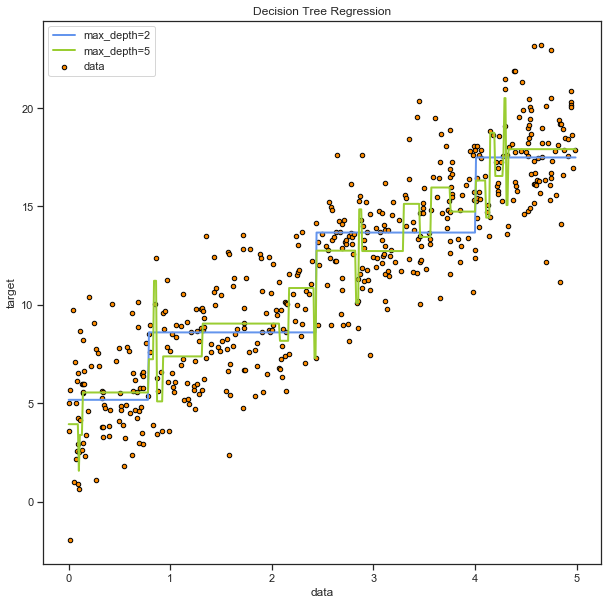

In [ ]:

import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
N = 500
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(N, 1), axis=0)
sig2 = 5
y = 3*X.ravel()+4 + np.random.normal(0, np.sqrt(sig2),N)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,10))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

REFERENCES_IA.png![image.png](attachment:image.png)